# **Analysez les ventes des librairies avec Python**

**Analyse des indicateurs de ventes**
Ma mission ici pour Lapage est d'analyser les forces, les faiblesses et le comportement des clients de Lapage.

Il m'a également été demandé d'analyser la relation entre le sexe d'un client et les catégories de livres achetés, puis le lien entre l'âge des clients et le montant total des achats, la fréquence d'achat, la taille moyenne du panier et les catégories de livres achetés.

Résumé :

II. Analyse des indicateurs de ventes
1. Ventes totales
-- un. Ventes totales par catégorie de produits

-- B. Ventes totales par tranche d'âge

-- C. Tendance globale dans le temps et évolution des ventes totales

2. Profil client et top/flop des ventes

-- un. Profil client

-- B. Top/flop du nombre de ventes

Conclusion (partie 2)

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
%cd 'gdrive/MyDrive/Colab Notebooks/Librairiee_5/'

/content/gdrive/MyDrive/Colab Notebooks/Librairiee_5


In [5]:
# Importation des biblioteques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import warnings

In [6]:
#importation des donees
lapage_df = pd.read_csv('export_lapage_df.csv', sep=';')
lapage_df.head()

,id_prod,time,session_id,client_id,date,year,period,sex,birth,age,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20,2022,2022-05,f,1986,37,4.18,0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02,2022,2022-02,m,1988,35,15.99,1
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18,2022,2022-06,f,1968,55,7.99,0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24,2021,2021-06,m,2000,23,69.99,2
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11,2023,2023-01,m,1980,43,4.99,0


In [7]:
#convertion de date
lapage_df['date'] = pd.to_datetime(lapage_df['date'])
lapage_df['date']

0        2022-05-20
1        2022-02-02
2        2022-06-18
3        2021-06-24
4        2023-01-11
            ...    
679327   2022-01-15
679328   2022-03-19
679329   2022-12-20
679330   2021-07-16
679331   2022-09-28
Name: date, Length: 679332, dtype: datetime64[ns]

##**II. Analyse des indicateurs de vente**

**1. Ventes total(CA)**

**a. CA par categories**

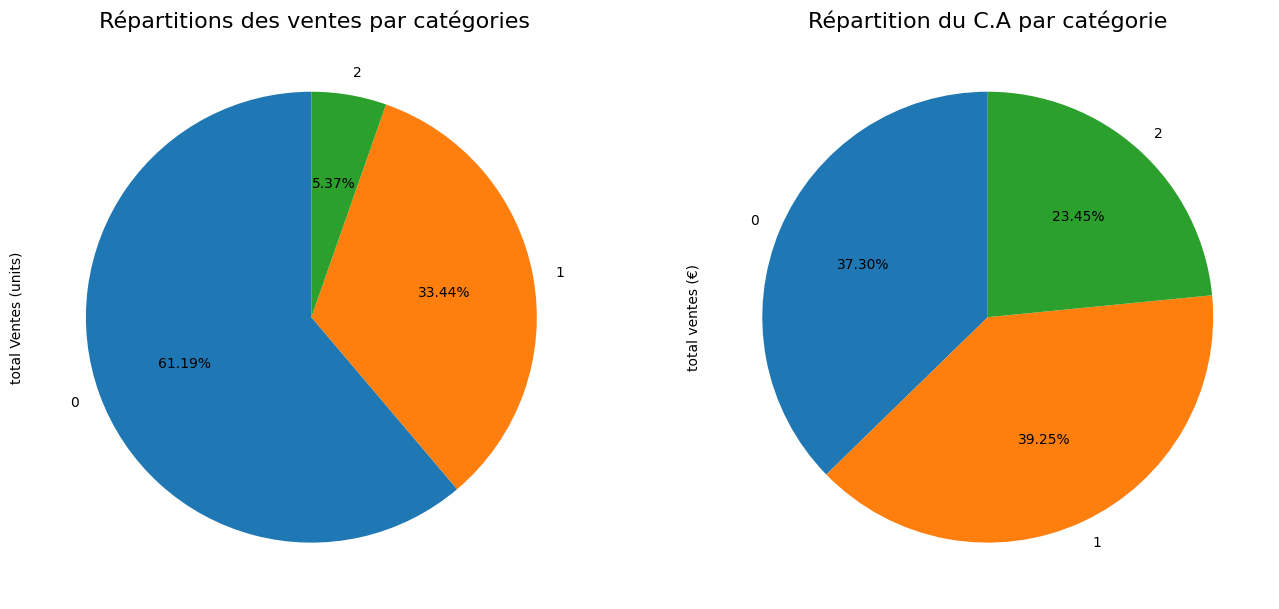

In [8]:
#CA parcategory: On Crée un sous-df avec un groupby sur la colonne "categ"
lapage_categ = lapage_df.groupby(["categ"]).agg({"price":"sum", "id_prod":"count"})
lapage_categ.rename(columns={"id_prod":"total Ventes (units)", "price":"total ventes (€)"}, inplace=True)

#on affiche le CA par catégories
plt.figure( figsize=(16,10) )

plt.subplot(121)
plt.title(" Répartitions des ventes par catégories", fontsize=16)
lapage_categ["total Ventes (units)"].plot(kind="pie", autopct='%1.2f%%', startangle=90)

plt.subplot(122)
plt.title("Répartition du C.A par catégorie", fontsize=16)
lapage_categ["total ventes (€)"].plot(kind="pie", autopct='%1.2f%%', startangle=90)

#plt.savefig("Part2.distribution des ventes par category.png", bbox_inches='tight')
plt.show()

###NOTES:
* Catégorie 0 : avec 61% des produits vendus et 37% des ventes, cette catégorie de produits semble bon marché et très appréciée des clients
* Catégorie 1 : avec 33% des produits vendus et 39% des ventes, cette catégorie de produits se situe dans la moyenne des prix et des ventes
* Catégorie 2 : avec 5% des produits vendus et 23% des ventes, cette catégorie de produits semble être la plus chère

**b. Total vente par groupe d'age**

In [9]:
# attribution des groupe d'age
lapage_df["age_groups"] = pd.cut(lapage_df["age"], bins=[15,25,35,45,55,65,75,100], labels = ["16 - 25 ans","26 - 35 ans","36 - 45 ans","46 - 55 ans","56 - 65 ans","66 - 75 ans","76 ans - plus"])
display(lapage_df.head())

,id_prod,time,session_id,client_id,date,year,period,sex,birth,age,price,categ,age_groups
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20,2022,2022-05,f,1986,37,4.18,0,36 - 45 ans
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02,2022,2022-02,m,1988,35,15.99,1,26 - 35 ans
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18,2022,2022-06,f,1968,55,7.99,0,46 - 55 ans
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24,2021,2021-06,m,2000,23,69.99,2,16 - 25 ans
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11,2023,2023-01,m,1980,43,4.99,0,36 - 45 ans


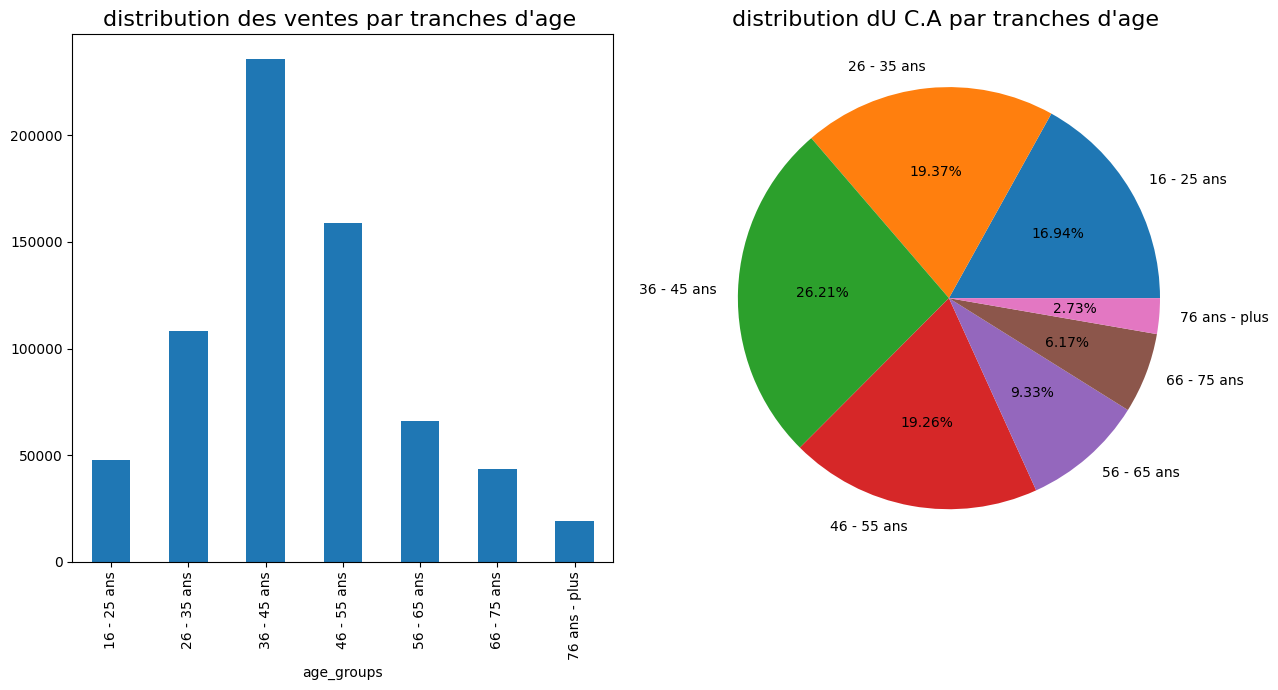

In [10]:
#grby age groups
lapage_age = lapage_df.groupby(["age_groups"]).agg({"price":"sum", "id_prod":"count"})
lapage_age.rename(columns={"id_prod":"total ventes (units)", "price":"total ventes (€)"}, inplace=True)

plt.figure( figsize=(13,7) )

plt.subplot(121)
plt.title("distribution des ventes par tranches d'age ", fontsize=16)
lapage_age["total ventes (units)"].plot(kind="bar")

plt.subplot(122)
plt.title("distribution dU C.A par tranches d'age ", fontsize=16)
lapage_age["total ventes (€)"].plot(kind="pie", autopct='%1.2f%%')
plt.ylabel("")

#plt.savefig("Part2.Sales distribution by age groups.png", bbox_inches='tight')
plt.tight_layout()
plt.show()

NOTES :
La tranche d'âge 36-45 ans est celle qui achète le plus de produits en ligne et celle qui réalise le plus fort pourcentage d'achats au cours des deux dernières années

## **Ventes totales par tranches d'âge et par catégorie**

------------------------------------------------------------------------------------------------------------------------
Catégorie 0


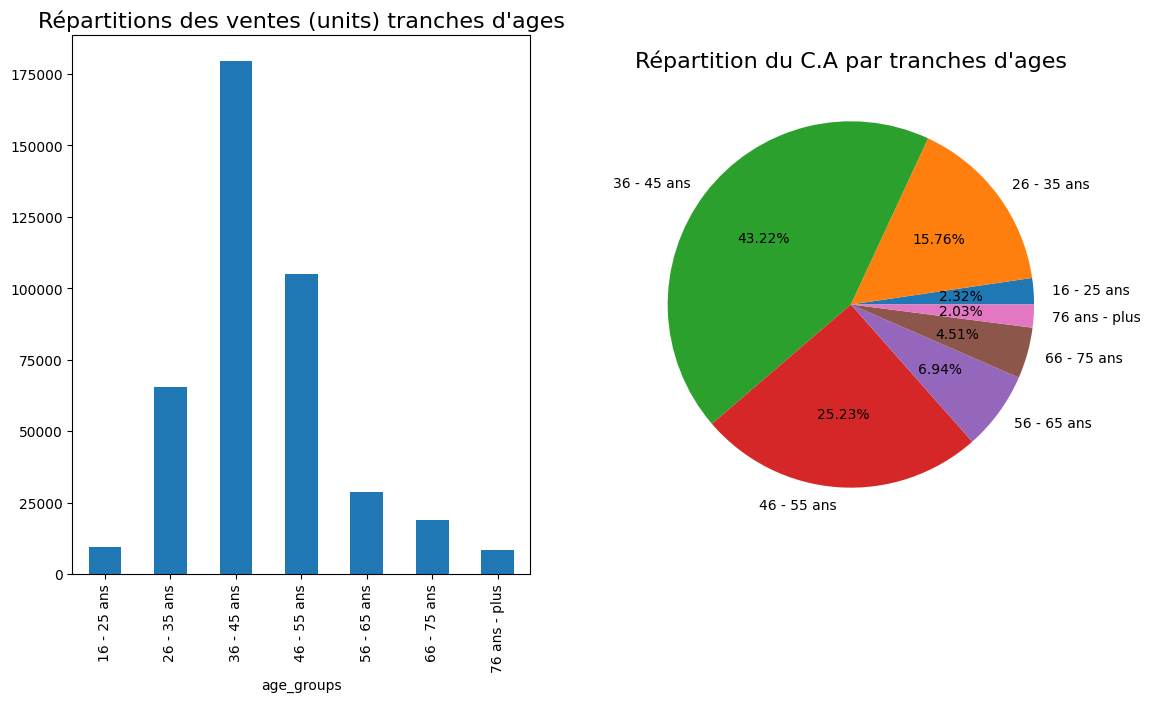

------------------------------------------------------------------------------------------------------------------------
Catégorie 1


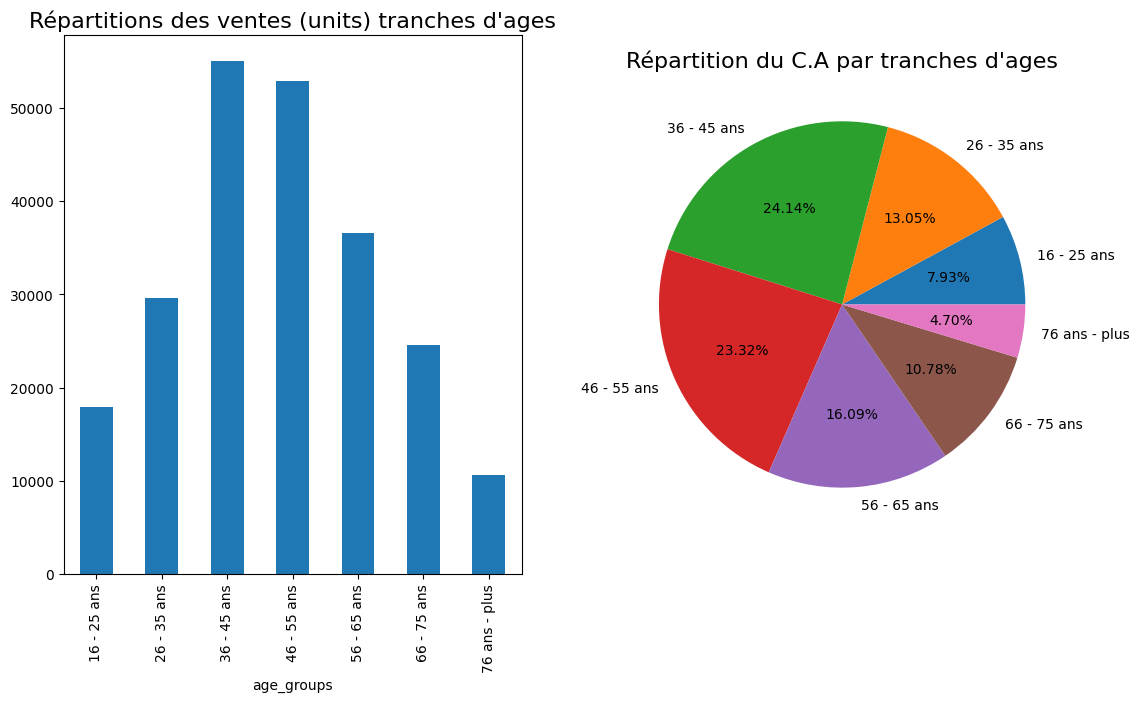

------------------------------------------------------------------------------------------------------------------------
Catégorie 2


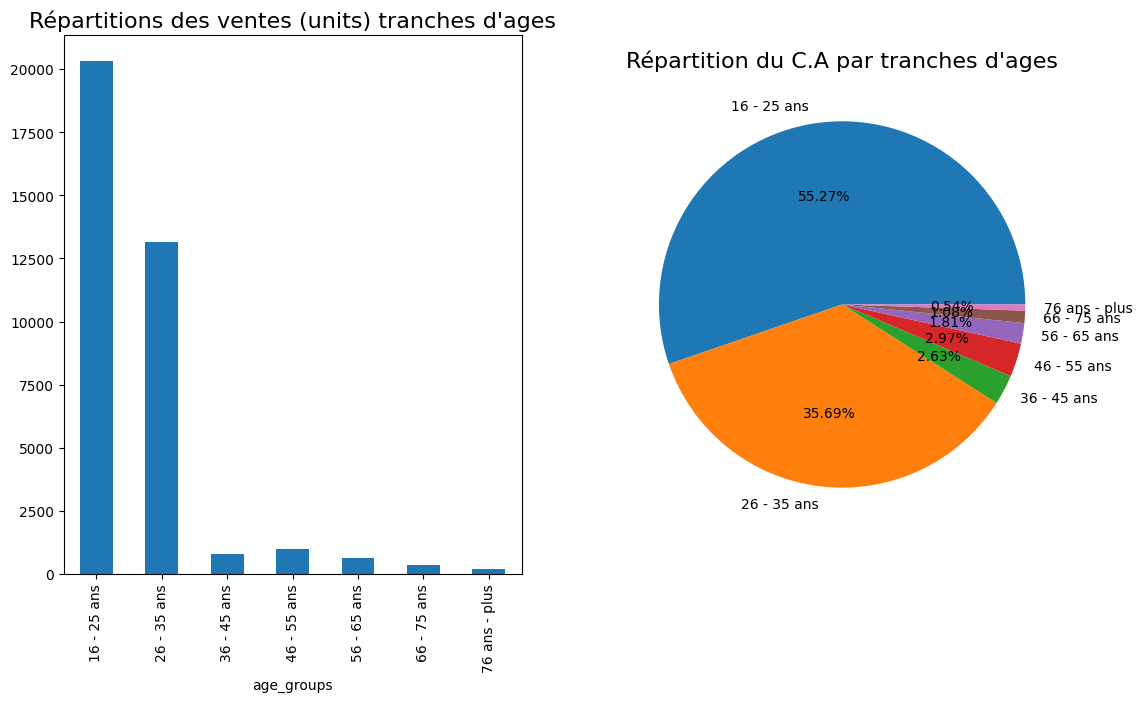

In [11]:
#Ventes totales par tranches d'âge et par catégorie
lapage_age_cat = lapage_df.groupby(['categ', 'age_groups']).agg({"price":"sum", "id_prod":"count"})
lapage_age_cat.rename(columns={"id_prod":"total ventes (units)", "price":"total ventes (€)"}, inplace=True)

for cat in lapage_df["categ"].unique():
    subset = lapage_df[lapage_df.categ == cat]
    s1 = subset.groupby(["age_groups"]).agg({"price":"sum", "id_prod":"count"})
    s1.rename(columns={"id_prod":"total ventes (units)", "price":"total ventes (€)"}, inplace=True)

    print("-"*120)
    print("Catégorie", cat)
    plt.figure( figsize=(13,7) )

    plt.subplot(121)
    plt.title("Répartitions des ventes (units) tranches d'ages", fontsize=16)
    s1["total ventes (units)"].plot(kind="bar")

    plt.subplot(122)
    plt.title("Répartition du C.A par tranches d'ages", fontsize=16)
    s1["total ventes (€)"].plot(kind="pie",  autopct='%1.2f%%')
    plt.ylabel("")

    plt.xticks(rotation = "vertical")
    plt.show()

notes :
* Catégorie 0 : la plupart des clients ont plus de 30 ans dans cette catégorie "produits bon marché" avec 43% des ventes pour la tranche d'âge 36-45 ans
* Catégorie 1 : cette catégorie au milieu des prix et des soldes semble intéresser proportionnellement toutes les tranches d'âge, mais en unités majoritairement les 36-55
* Catégorie 2 : la plupart des clients ont moins de 25 ans dans cette catégorie "produits chers" avec 60% des ventes pour les 19-25 ans


### **c. Tendance (CA en fct du temps) globale dans le temps et évolution des ventes**

In [12]:
sales_day = lapage_df.groupby(lapage_df['date'].dt.date).sum()['price']

<ipython-input-12-57a9ee17abd4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_day = lapage_df.groupby(lapage_df['date'].dt.date).sum()['price']


<ipython-input-13-13e0fedacbc0>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_day = lapage_df.groupby(lapage_df['date'].dt.date).sum()['price']


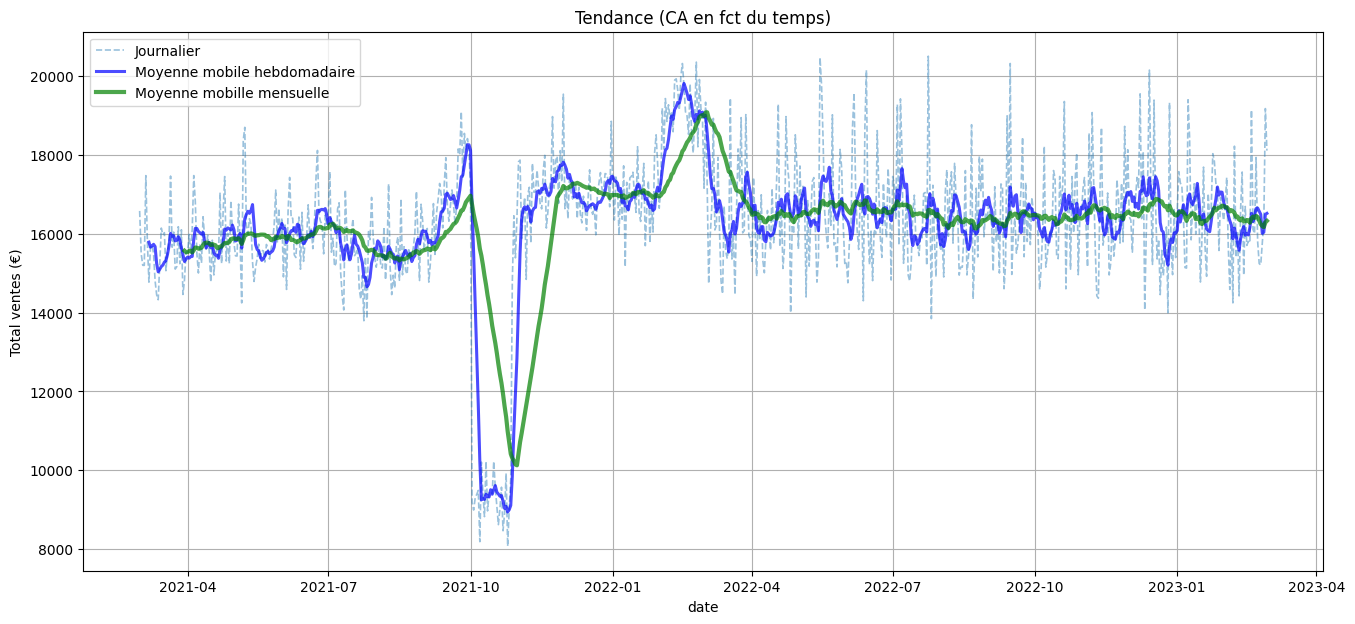

In [13]:
#Tendance (CA en fct du temps)
sales_day = lapage_df.groupby(lapage_df['date'].dt.date).sum()['price']
sales_week = sales_day.rolling(7).mean()
sales_month = sales_day.rolling(30).mean()

plt.figure(figsize=(16,7))
sales_day.plot(label="Journalier", lw=1.2, style='--', alpha=0.45, ms=4)
sales_week.plot(label="Moyenne mobile hebdomadaire", lw=2.2, color='b', alpha=0.7)
sales_month.plot(label="Moyenne mobille mensuelle", lw=3, color='g', alpha=0.7)

plt.legend()
plt.grid()
plt.ylabel("Total ventes (€)")
plt.title("Tendance (CA en fct du temps)");
#plt.savefig("Part2.Overall trend over time.png", bbox_inches='tight')

notes:
Les ventes en ligne ont atteint un pic de plus de 20 000 € par jour en février 2022

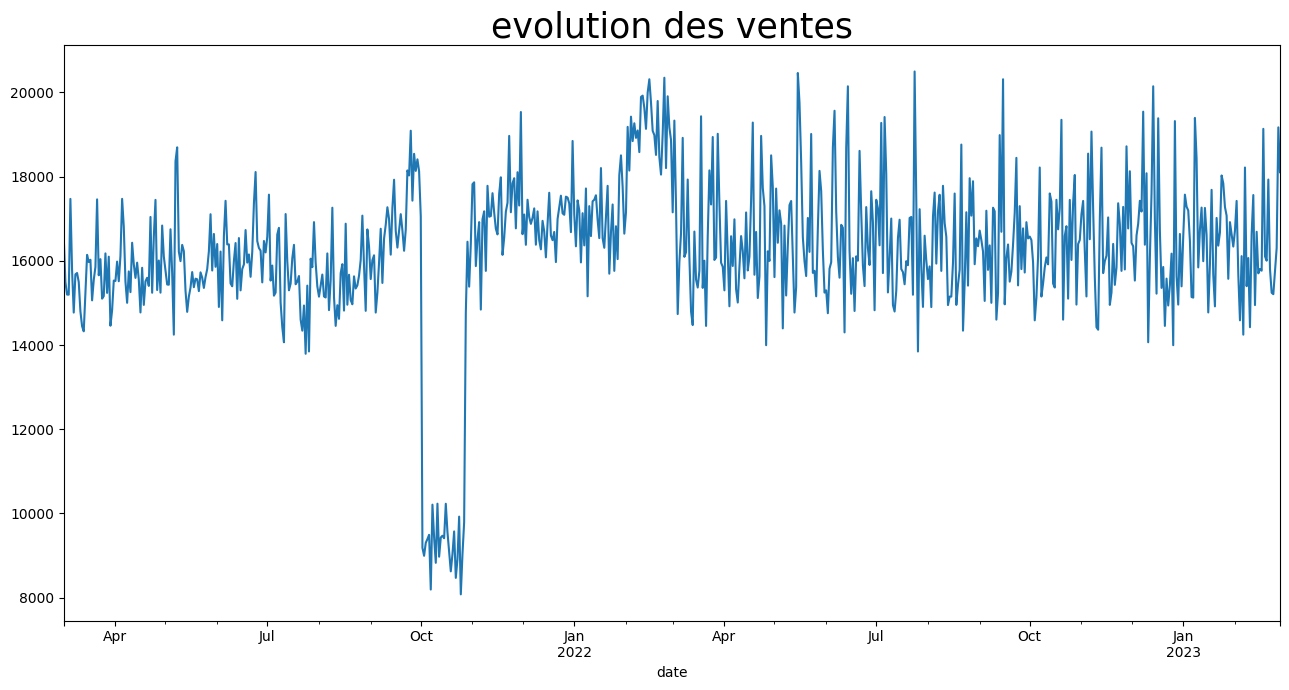

In [14]:
#evolution des ventes
lapage_per = lapage_df.groupby(['date']).agg({"price":"sum", "id_prod":"count"})
lapage_per.rename(columns={"id_prod":"total ventes (units)", "price":"total ventes (€)"}, inplace=True)

plt.figure(figsize=(13,7))

plt.title("evolution des ventes", fontsize=25)
lapage_per["total ventes (€)"].plot(kind="line")

plt.tight_layout()
plt.show()

Danger :
Il y a une baisse importante des ventes en octobre 2021 à analyser
On étudie l'évolution des ventes d'octobre 2021 par catégorie pour comprendre la problématique ici

**Total des ventes par âge par période, date et catégorie en octobre 2021 :**

--------------------------------------------------
Catégorie 0


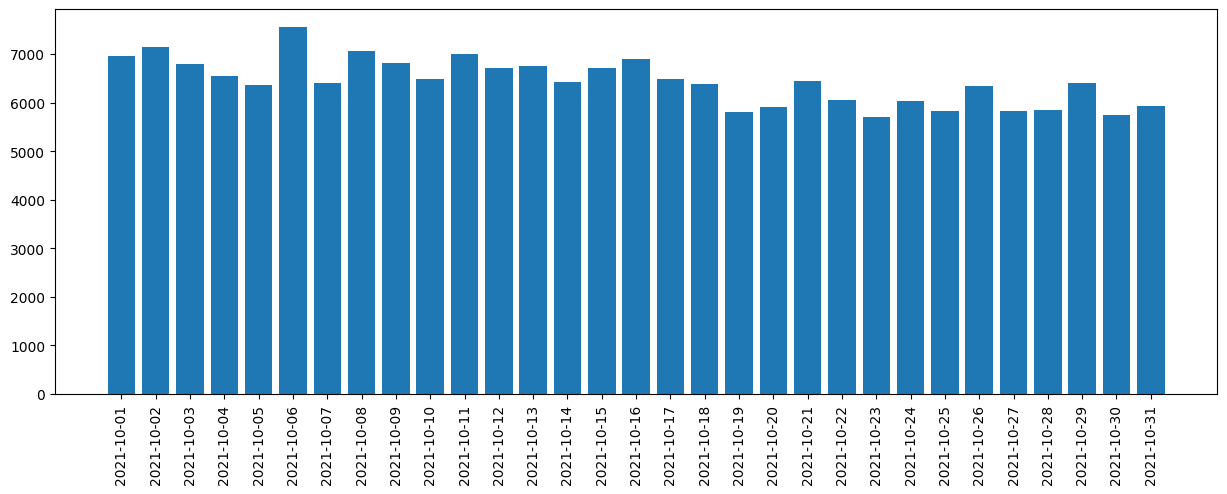

--------------------------------------------------
Catégorie 1


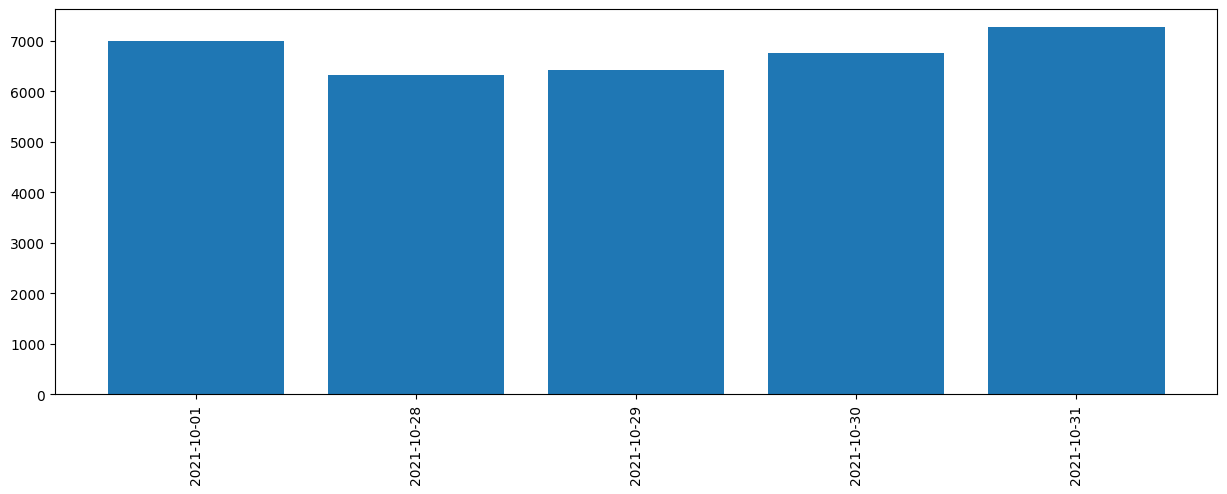

--------------------------------------------------
Catégorie 2


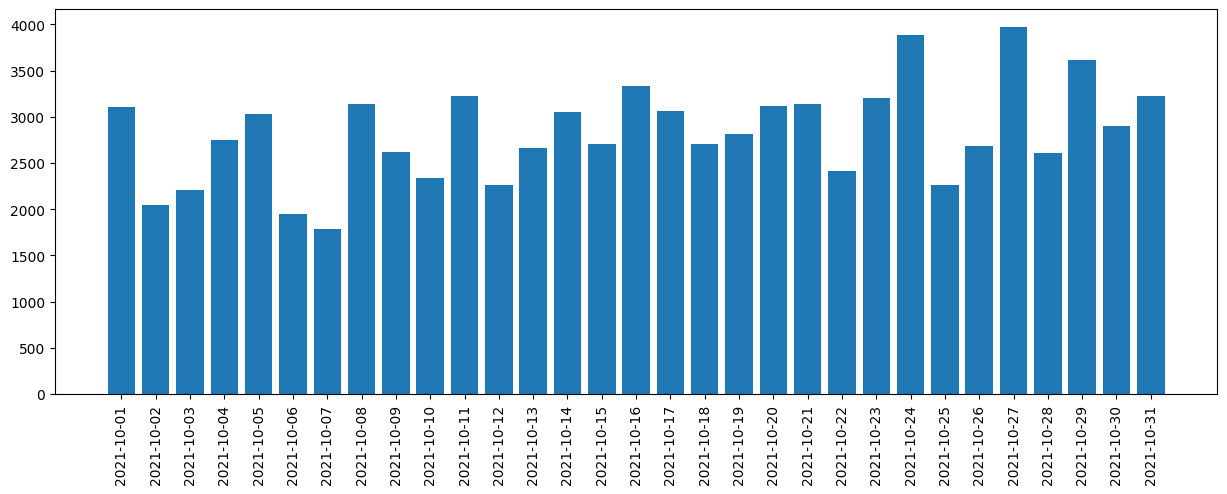

In [15]:
# dataframe octobre 2021
lapage_oct_21 = lapage_df.loc[lapage_df["period"]=='2021-10'].copy()

#Total des ventes par âge par période, date et catégorie en octobre 2021 :
lapage_oct_21_cat = lapage_oct_21.groupby(["period","date","categ"]).agg({"price":"sum","id_prod":"count"})
lapage_oct_21_cat.rename(columns={"price":"total sales (€)", "id_prod":"total sales (units)"}, inplace=True)
lapage_oct_21_cat.to_csv("lapage_oct_21_cat.csv", sep=";")
lapage_oct_21_cat = pd.read_csv('lapage_oct_21_cat.csv', sep=';')

for cat in lapage_oct_21_cat["categ"].unique():
    subset = lapage_oct_21_cat[lapage_oct_21_cat.categ == cat]
    print("-"*50)
    print("Catégorie", cat)
    plt.figure(figsize=(15,5))
    plt.bar(subset["date"], subset["total sales (€)"])
    plt.xticks(rotation = "vertical")
    plt.show()

Danger :
* Aucune vente enregistrée du 02 au 27 octobre 2021 sur la catégorie 1
* Afin de ne pas avoir de moyennes biaisées, il est préférable de supprimer le mois d'octobre 2021 dans la base de données

**Suppression du mois d'octobre 2021 dans la base de données :**


In [16]:
lapage_df.shape

(679332, 13)

In [17]:
#obtenir les noms des index pour chaque période qui a la valeur "2021-10"
indexNames = lapage_df[lapage_df['period'] == '2021-10' ].index
#supprimer ces index de ligne de la base de données
lapage_df.drop(indexNames , inplace=True)
lapage_df.shape

(657726, 13)

**Répartition des ventes totales par période et catégorie de produits**

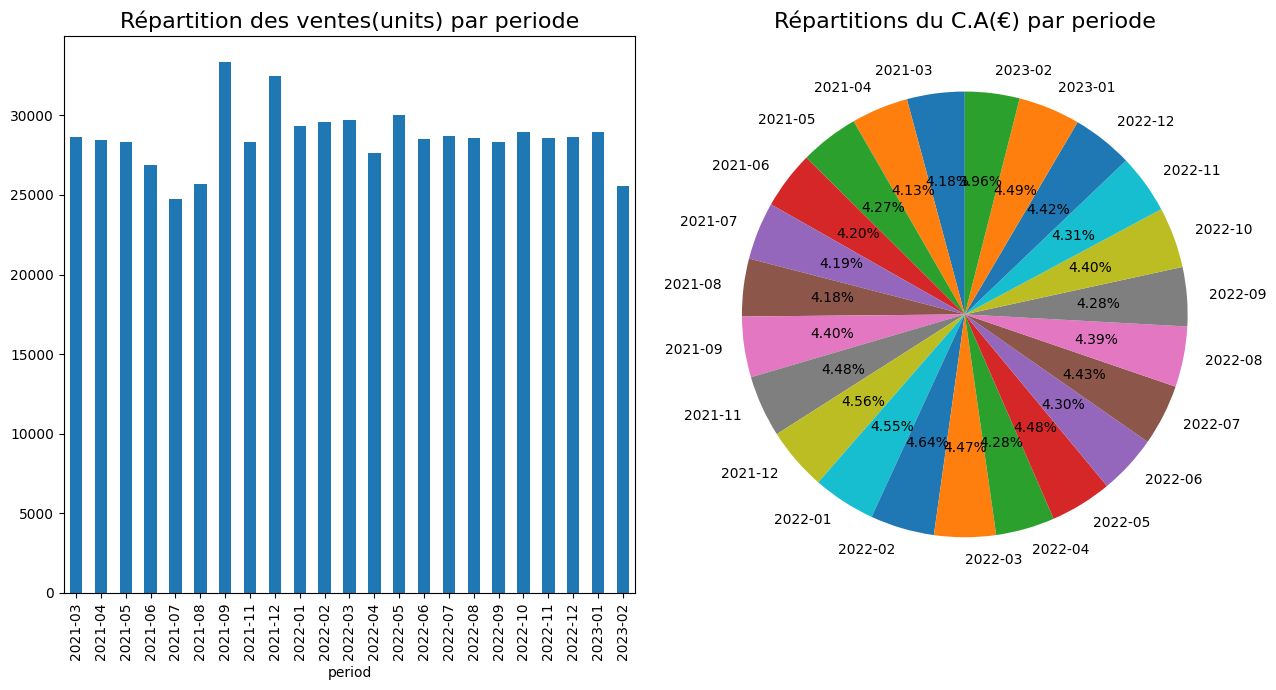

In [18]:
#groupe de distribution des ventes totales par période
lapage_df_period = lapage_df.groupby(["period"]).agg({"price":"sum", "id_prod":"count"})
lapage_df_period.rename(columns={"id_prod":"total ventes (units)", "price":"total ventes (€)"}, inplace=True)

plt.figure( figsize=(13,7) )

plt.subplot(121)
plt.title("Répartition des ventes(units) par periode", fontsize=16)
lapage_df_period["total ventes (units)"].plot(kind="bar")

plt.subplot(122)
plt.title("Répartitions du C.A(€) par periode", fontsize=16)
lapage_df_period["total ventes (€)"].plot(kind="pie", autopct='%1.2f%%', startangle=90)
plt.ylabel("")

plt.tight_layout()
#plt.savefig("Part2.Sales distribution by period.png", bbox_inches='tight')
plt.show()

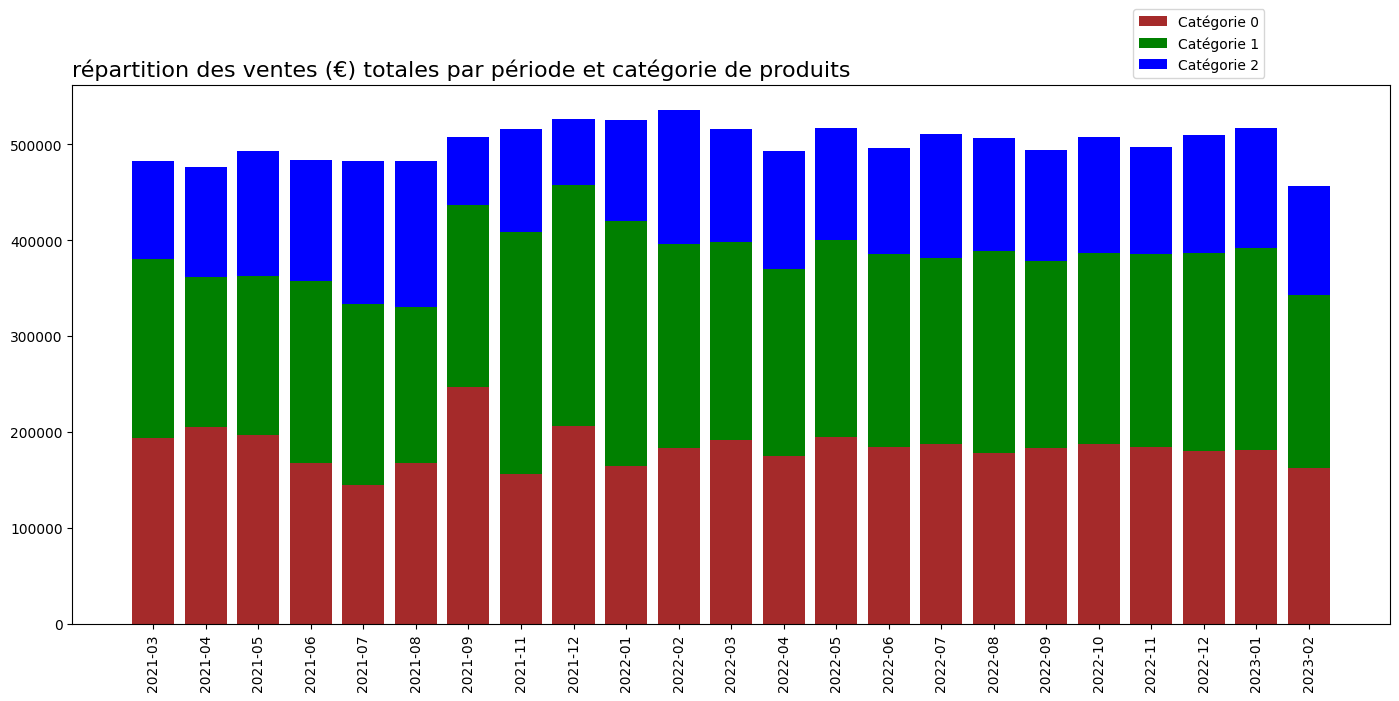

---------------------------------------------------------------------------------------------------- 



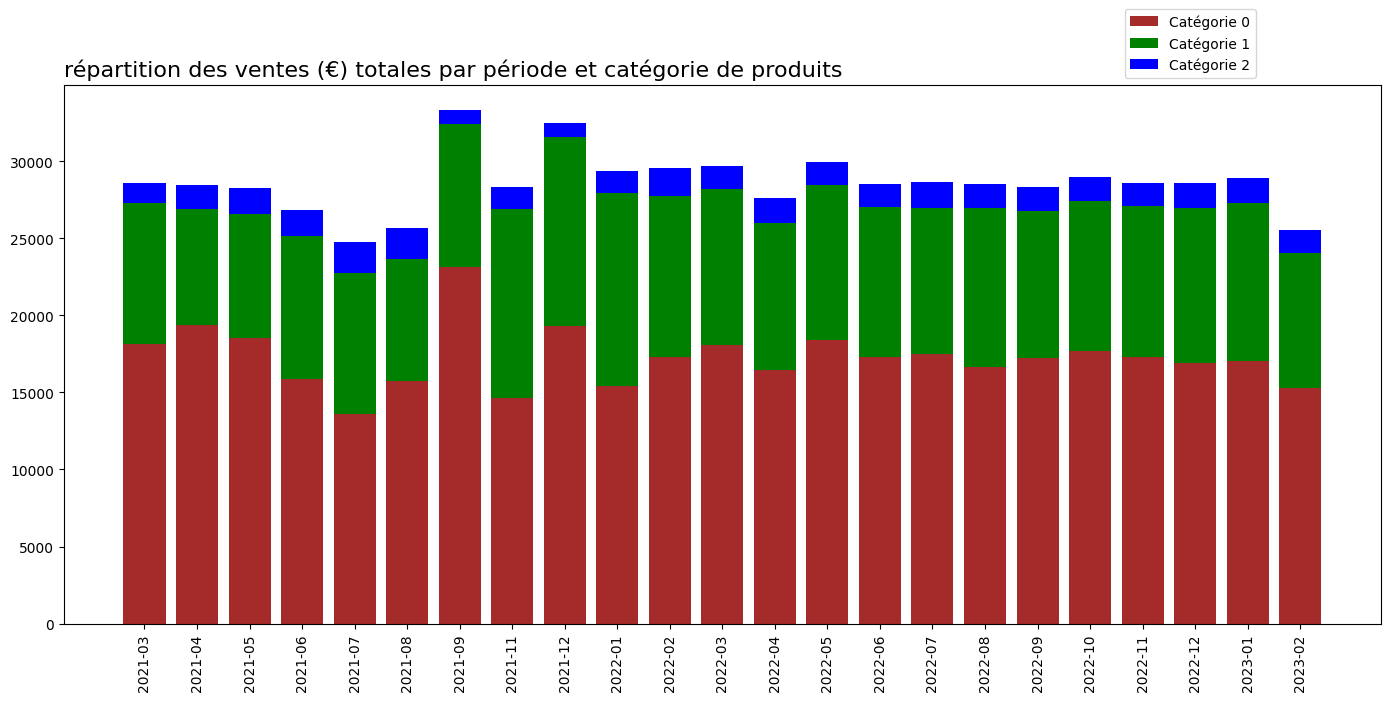

In [19]:

#répartition des ventes totales par période et catégorie de produits
lapage_cat_0 = lapage_df.loc[lapage_df["categ"]==0].copy()#category 0 dataframe
lapage_cat_1 = lapage_df.loc[lapage_df["categ"]==1].copy()#category 1 dataframe
lapage_cat_2 = lapage_df.loc[lapage_df["categ"]==2].copy()#category 2 dataframe

#regrouper par période pour la catégorie 0
lapage_cat_0_total = lapage_cat_0.groupby(["period"]).agg({"price":"sum","id_prod":"count"})
lapage_cat_0_total.rename(columns={"price":"total sales (€)", "id_prod":"total sales (units)"}, inplace=True)
lapage_cat_0_total.to_csv("lapage_cat_0_total.csv", sep=";")
lapage_cat_0_total = pd.read_csv('lapage_cat_0_total.csv', sep=';')

#regrouper par période pour la catégorie 1
lapage_cat_1_total = lapage_cat_1.groupby(["period"]).agg({"price":"sum","id_prod":"count"})
lapage_cat_1_total.rename(columns={"price":"total sales (€)", "id_prod":"total sales (units)"}, inplace=True)
lapage_cat_1_total.to_csv("lapage_cat_1_total.csv", sep=";")
lapage_cat_1_total = pd.read_csv('lapage_cat_1_total.csv', sep=';')

#regrouper par période pour la catégorie 2
lapage_cat_2_total = lapage_cat_2.groupby(["period"]).agg({"price":"sum","id_prod":"count"})
lapage_cat_2_total.rename(columns={"price":"total sales (€)", "id_prod":"total sales (units)"}, inplace=True)
lapage_cat_2_total.to_csv("lapage_cat_2_total.csv", sep=";")
lapage_cat_2_total = pd.read_csv('lapage_cat_2_total.csv', sep=';')

plt.figure(figsize=(17,7))
plt.bar(lapage_cat_0_total["period"],lapage_cat_0_total["total sales (€)"],color="brown",label="Catégorie 0")
plt.bar(lapage_cat_1_total["period"],lapage_cat_1_total["total sales (€)"],color="green",bottom=np.array(lapage_cat_0_total["total sales (€)"]),label="Catégorie 1")
plt.bar(lapage_cat_2_total["period"],lapage_cat_2_total["total sales (€)"],color="blue",bottom=np.array(lapage_cat_0_total["total sales (€)"])+np.array(lapage_cat_1_total["total sales (€)"]),label="Catégorie 2")
plt.title("répartition des ventes (€) totales par période et catégorie de produits  ", fontsize=16, loc="left")
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.xticks(rotation = "vertical")
#plt.savefig("Part2.Total sales (€) distribution by period and category of products.png", bbox_inches='tight')
plt.show()

print('-'*100, "\n")

plt.figure(figsize=(17,7))
plt.bar(lapage_cat_0_total["period"],lapage_cat_0_total["total sales (units)"],color="brown",label="Catégorie 0")
plt.bar(lapage_cat_1_total["period"],lapage_cat_1_total["total sales (units)"],color="green",bottom=np.array(lapage_cat_0_total["total sales (units)"]),label="Catégorie 1")
plt.bar(lapage_cat_2_total["period"],lapage_cat_2_total["total sales (units)"],color="blue",bottom=np.array(lapage_cat_0_total["total sales (units)"])+np.array(lapage_cat_1_total["total sales (units)"]),label="Catégorie 2")
plt.title("répartition des ventes (€) totales par période et catégorie de produits ", fontsize=16, loc="left")
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.xticks(rotation = "vertical")
#plt.savefig("Part2.Total sales (units) distribution by period and category of products.png", bbox_inches='tight')
plt.show()

Notes :
L'évolution des ventes totales est plutôt stable dans le temps pour chaque catégorie de produits, avec un mois de septembre 2021 en forte proportion de ventes unitaires sur les catégories les moins chères 0 et 1 mais en faible proportion sur la catégorie la plus chère numéro 2


## **2. Profil client et top/flop des ventes**

**a. Profil client**


* Clients aberrants

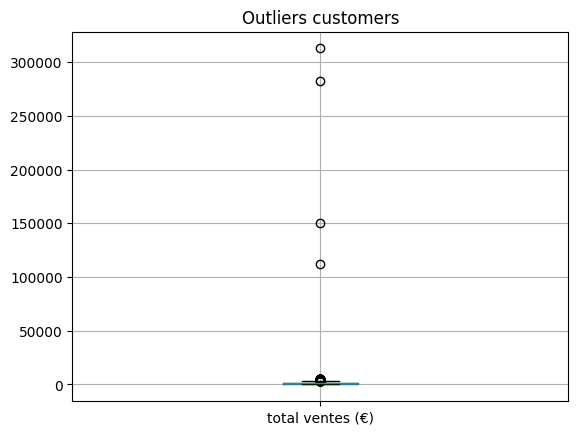

,total ventes (€),fréquence d'achat
client_id,,
c_1609,312755.08,24472
c_4958,282654.61,5090
c_6714,149847.59,8903
c_3454,111798.63,6635
c_2899,5214.05,105
...,...,...
c_2793,12.99,1
c_4648,11.20,1
c_240,11.06,1


In [20]:
#profile client (customers)
profile = lapage_df.groupby(["client_id"]).agg({"price":"sum", "id_prod":"count"})
profile.rename(columns={"price":"total ventes (€)", "id_prod":"fréquence d'achat"}, inplace=True)

#outliers customer checkin
profile.boxplot(column=["total ventes (€)"])
plt.title("Outliers customers")
#plt.savefig("Part2.Outliers customers.png", bbox_inches='tight')
plt.show()
profile.sort_values(by=["total ventes (€)"], ascending=False)

Notes :

* Les clients c_1609 , c_4958, c_6714 et c_3454 se démarquent des autres par leur volume d'achats conséquent. Ils semblent être des clients B2B
* Il serait utile d'ajouter ces nouvelles informations dans notre dataframe de profil et dans la base de données lapage

In [21]:
#attribution du profil client sur la dataframe du profil
profile["client_profile"] = pd.cut(profile["total ventes (€)"], bins=[0,10000,1000000000], labels = ["B2C","B2B"])
profile.sort_values(by="total ventes (€)", ascending=False).head()

,total ventes (€),fréquence d'achat,client_profile
client_id,,,
c_1609,312755.08,24472,B2B
c_4958,282654.61,5090,B2B
c_6714,149847.59,8903,B2B
c_3454,111798.63,6635,B2B
c_2899,5214.05,105,B2C


* Répartition des ventes par profil client

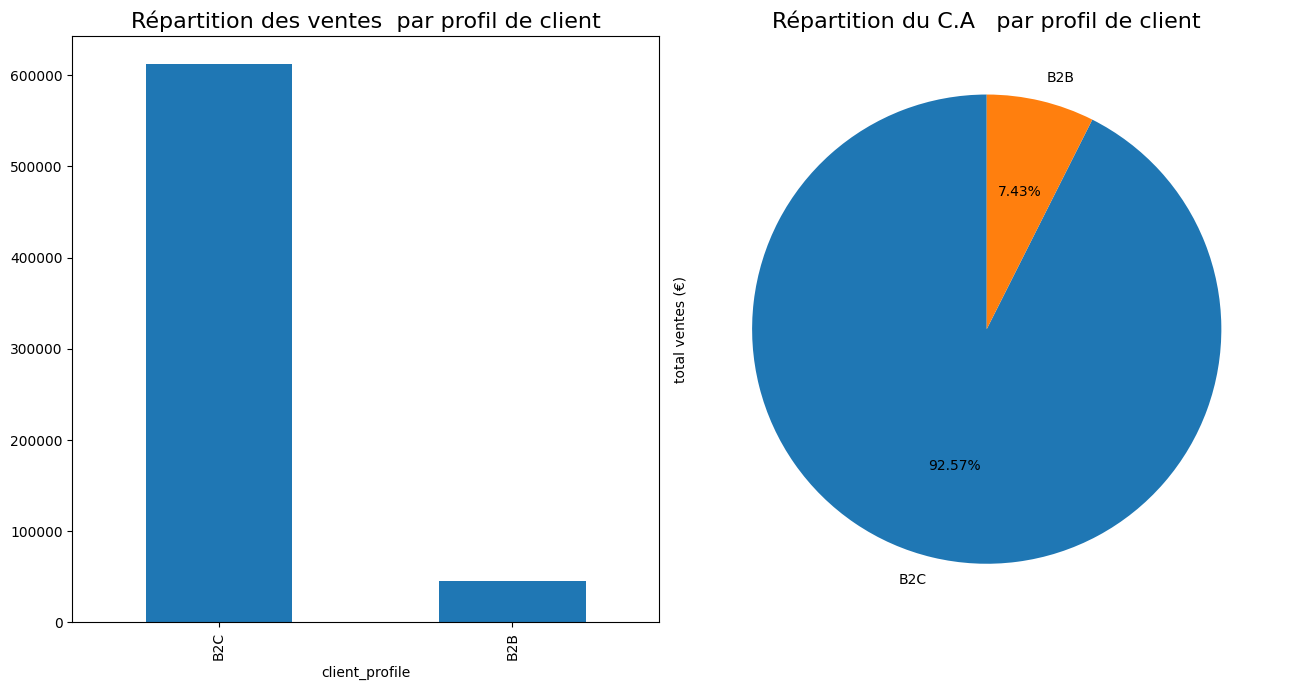

In [22]:
client_profile = profile.groupby("client_profile").sum()#group by client profile

plt.figure( figsize=(13,7) )

plt.subplot(121)
plt.title("Répartition des ventes  par profil de client", fontsize=16)
client_profile["fréquence d'achat"].plot(kind="bar")

plt.subplot(122)
plt.title("Répartition du C.A   par profil de client", fontsize=16)
client_profile["total ventes (€)"].plot(kind="pie", autopct='%1.2f%%', startangle=90)

plt.tight_layout()
#plt.savefig("Part2.Total sales distribution by client profile.png", bbox_inches='tight')
plt.show()

In [35]:
#new B2C dataframe
B2C = profile.loc[profile["client_profile"]=="B2C"]
#new B2B dataframe
B2B = profile.loc[profile["client_profile"]=='B2B']
print("Les clientes B2B représentent 7% des ventes totales", round(B2B["client_profile"].count()/lapage_df["client_id"].nunique()*100,2), "% of total customers")

Les clientes B2B représentent 7% des ventes totales 0.05 % of total customers


Notes :
* Les clients B2B représentent 7% des ventes totales pour seulement 0,05% des clients totaux
* Ici nous rajoutons l'information client_profile dans la dataframe du profil mais il est inutile de rajouter cette information dans la base de données de la boutique en ligne (lapage_df) car nous n'avons aucun intérêt stratégique à étudier les clients B2B par leur âge et leur sexe contrairement aux clients B2C
*Nous pouvons analyser le profil des clients B2C en excluant les quatre clients B2B

**Concentration relative des ventes (analyse de la courbe de Lorenz sur les clients B2C)**

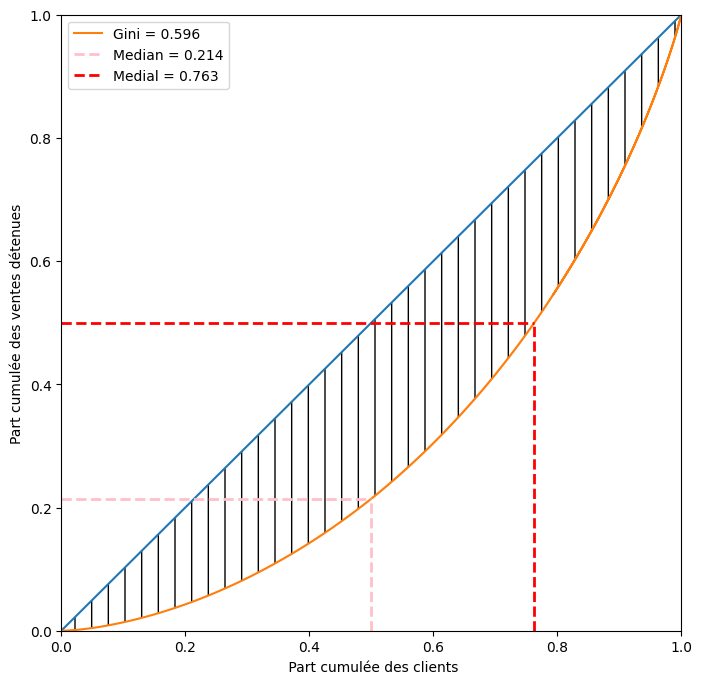

In [24]:
#total du nbre de ventes
n = len(B2C['total ventes (€)'])

#courbe de lorenz
lorenz = np.cumsum(np.sort(B2C['total ventes (€)'].values)) / B2C['total ventes (€)'].values.sum()
xaxis = np.linspace(0,1,len(lorenz))
#aire sous la courbe de Lorenz
s = (lorenz.sum()-lorenz[-1]/2-lorenz[0]/2)/n
#aire entre la ligne d'équirépartition et la courbe de Lorenz
s1 = 0.5-s
#calcul du coefficient de Gini
Gini = 2*s

plt.figure(figsize=(8,8))

plt.xlim(0,1)
plt.xlabel(" Part cumulée des clients")

plt.ylim(0,1)
plt.ylabel("Part cumulée des ventes détenues")

#equidistribution line
plt.plot([0,1], [0,1])
plt.fill_between(xaxis, xaxis, lorenz,alpha=0.001, hatch="|",)
plt.plot(xaxis, lorenz, drawstyle='steps-post', label='Gini = %.3f'%Gini)#lorenz curve

Me = lorenz[int(len(lorenz) / 2)]
plt.plot([0.5, 0.5], [0, Me], color='pink', linestyle='--', linewidth=2, label='Median = %.3f'%Me)
plt.plot([0, 0.5], [Me, Me], color='pink', linestyle='--', linewidth=2)

Ml = len(lorenz[lorenz<= 0.5]) / len(lorenz)
plt.plot([0, Ml], [0.5, 0.5], color='red', linestyle='--', linewidth=2, label='Medial = %.3f'%Ml)
plt.plot([Ml, Ml], [0, 0.5], color='red', linestyle='--', linewidth=2)

plt.legend()
#plt.savefig("Part2.Relative sales concentration (Lorenz curve analysis on B2C customers).png", bbox_inches='tight')
plt.show()

Notes :
* La première moitié des clients B2C détient 21% des ventes, et donc l'autre moitié détient 79% des ventes
* De plus, la première moitié des ventes est détenue par 76% des clients, et donc l'autre moitié est détenue par 24% des clients
* La concentration des ventes est assez inégale entre les clients

**Population pyramid (on B2C customers) **

In [25]:
#new lapage b2C dataframe
lapage_df_b2c = lapage_df.copy()
lapage_df_b2c.shape

(657726, 13)

In [26]:
#index each B2B customers and delete those rows indexed from the database
indexNames = lapage_df_b2c[lapage_df_b2c["client_id"] == 'c_1609'].index
lapage_df_b2c.drop(indexNames, inplace=True)
indexNames1 = lapage_df_b2c[lapage_df_b2c["client_id"] == 'c_4958'].index
lapage_df_b2c.drop(indexNames1, inplace=True)
indexNames2 = lapage_df_b2c[lapage_df_b2c["client_id"] == 'c_6714'].index
lapage_df_b2c.drop(indexNames2, inplace=True)
indexNames3 = lapage_df_b2c[lapage_df_b2c["client_id"] == 'c_3454'].index
lapage_df_b2c.drop(indexNames3, inplace=True)
lapage_df_b2c.shape

(612626, 13)

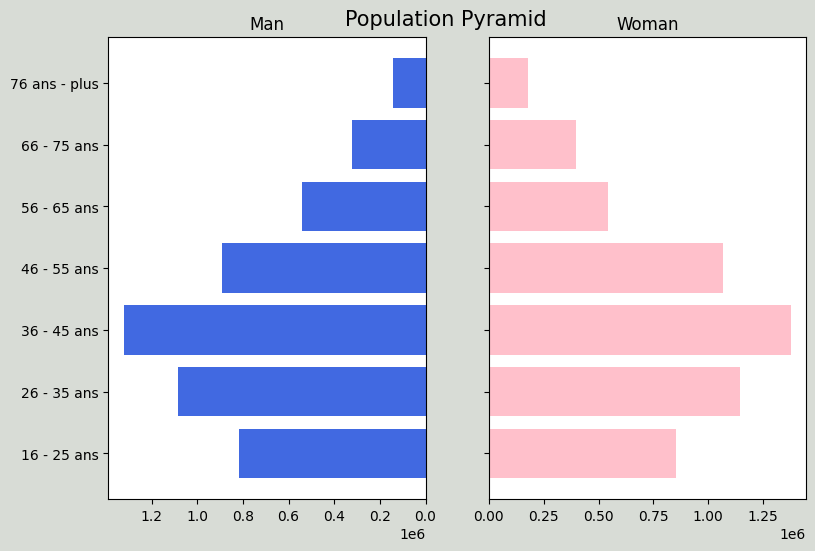

In [27]:
lapage_age_sex = lapage_df_b2c.groupby(["age_groups", "sex"]).agg({"id_prod":"count","price":"sum"})#group by age groups and sex
lapage_age_sex.to_csv("lapage_age_sex.csv", sep=";")
lapage_age_sex = pd.read_csv('lapage_age_sex.csv', sep=';')

woman = lapage_age_sex[lapage_age_sex["sex"]=="f"].copy()# dataframe  cumstomer femmes
woman.rename(columns={"id_prod":"woman_numer"}, inplace=True)

man = lapage_age_sex[lapage_age_sex["sex"]=="m"].copy()# dataframe  customer homme
man.rename(columns={"id_prod":"man_number"}, inplace=True)

pyramid = pd.merge(man, woman, on="age_groups")#fusions du dataframe homme et femme
pyramid.drop(columns=["sex_x","sex_y"], inplace=True)
pyramid.rename(columns={"price_x":"man_total_sales", "price_y":"woman_total_sales"}, inplace=True)
pyramid["total_sales"] = round(pyramid["man_total_sales"] + pyramid["woman_total_sales"],2)

y = pyramid["age_groups"]#pyramid axises
x_man = pyramid["man_total_sales"]
x_woman = pyramid["woman_total_sales"]

fig, axes = plt.subplots(ncols=2, sharey=True,figsize=(9, 6))
fig.patch.set_facecolor('xkcd:light grey')#background color
plt.figtext(.5,.9,"Population Pyramid", fontsize=15, ha='center')#plot title

#adjust grid parameters and specify labels for y-axis
axes[0].barh(y, x_man, align='center', color='royalblue')
axes[0].set(title="Man")
axes[1].barh(y, x_woman, align='center', color='pink')
axes[1].set(title="Woman")

axes[0].invert_xaxis()#invert
plt.savefig("Part2.Population pyramid.png", bbox_inches='tight')
plt.show()

notes:
* La répartition des ventes est la même quel que soit le sexe du client avec une consommation un peu plus élevée chez les femmes
* Il croît initialement et atteint son apogée dans la tranche d'âge 36-45 ans, puis il diminue avec l'âge

**b. Top/flop du nombre de ventes**

* nouveau dataframe groupby products avec nouvelle colonne "nombre de ventes" :

In [28]:
lapage_df_prod = lapage_df.copy()
lapage_df_prod = lapage_df_prod.assign(number_of_sales=1)
lapage_df_prod = lapage_df_prod.groupby(["id_prod","categ","price"]).agg({"number_of_sales":"sum"}).reset_index()
lapage_df_prod["total sales (€)"] = lapage_df_prod["price"] * lapage_df_prod["number_of_sales"]
lapage_df_prod

,id_prod,categ,price,number_of_sales,total sales (€)
0,0_0,0,3.75,1194,4477.50
1,0_1,0,10.99,469,5154.31
2,0_10,0,17.95,18,323.10
3,0_100,0,20.60,3,61.80
4,0_1000,0,6.84,408,2790.72
...,...,...,...,...,...
3259,2_95,2,98.99,4,395.96
3260,2_96,2,47.91,581,27835.71
3261,2_97,2,160.99,13,2092.87
3262,2_98,2,149.74,1,149.74


* top refferences

In [29]:
top_ref = lapage_df_prod[(lapage_df_prod["number_of_sales"] >= 1000)]
top_ref.sort_values(by=["number_of_sales"], ascending=False)
print(len(top_ref),"Les références ont été vendues plus de 1000 fois au cours des deux dernières années sur la librairie en ligne:")
top_ref

124 Les références ont été vendues plus de 1000 fois au cours des deux dernières années sur la librairie en ligne:


,id_prod,categ,price,number_of_sales,total sales (€)
0,0_0,0,3.75,1194,4477.50
394,0_1358,0,16.49,1052,17347.48
403,0_1366,0,16.65,1031,17166.15
446,0_1405,0,4.99,1077,5374.23
448,0_1407,0,13.99,1045,14619.55
...,...,...,...,...,...
2713,1_480,1,19.08,1562,29802.96
2716,1_483,1,15.99,1377,22018.23
2721,1_488,1,12.19,1503,18321.57
2727,1_493,1,10.99,1584,17408.16


<ipython-input-30-395e310ef1cd>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_ref_categ = top_ref.groupby("categ").sum()


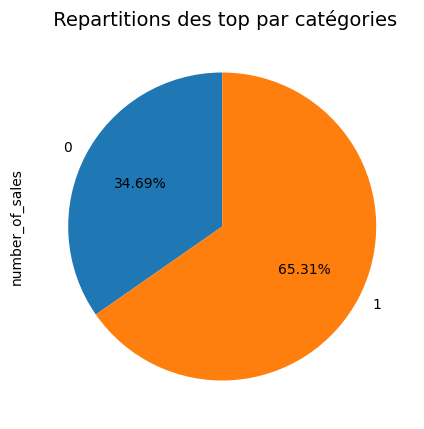

In [30]:
#top references group by category
top_ref_categ = top_ref.groupby("categ").sum()

plt.figure(figsize=(9,5))
plt.title(" Repartitions des top par catégories", fontsize=14)
top_ref_categ["number_of_sales"].plot(kind="pie", autopct='%1.2f%%', startangle=90)
#plt.savefig("Part2.Top references distribution by category.png", bbox_inches='tight')
plt.show()

notes :
* 124 références ont été vendues plus de 1000 fois ces deux dernières années sur la librairie en ligne
* Il n'y a pas de top références dans la catégorie numéro 2 (la plus chère)
* 2/3 des meilleures références sont dans la catégorie numéro 1 et 1/3 dans la catégorie numéro 0

* flop refferences

In [31]:
flop_ref = lapage_df_prod[(lapage_df_prod["number_of_sales"] < 2)]
flop_ref.sort_values(by=["number_of_sales"], ascending=True)
print(len(flop_ref),"Les références ont été vendues moins de 2 fois ces deux dernières années sur la librairie en ligne :")
flop_ref

20 Les références ont été vendues moins de 2 fois ces deux dernières années sur la librairie en ligne :


,id_prod,categ,price,number_of_sales,total sales (€)
166,0_1151,0,2.99,1,2.99
313,0_1284,0,1.38,1,1.38
548,0_1498,0,2.48,1,2.48
588,0_1533,0,27.99,1,27.99
594,0_1539,0,0.99,1,0.99
656,0_1595,0,2.99,1,2.99
664,0_1601,0,1.99,1,1.99
697,0_1633,0,24.99,1,24.99
751,0_1683,0,2.99,1,2.99
801,0_1728,0,2.27,1,2.27


<ipython-input-32-4f4636dbf8e5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flop_ref_categ = flop_ref.groupby("categ").sum()


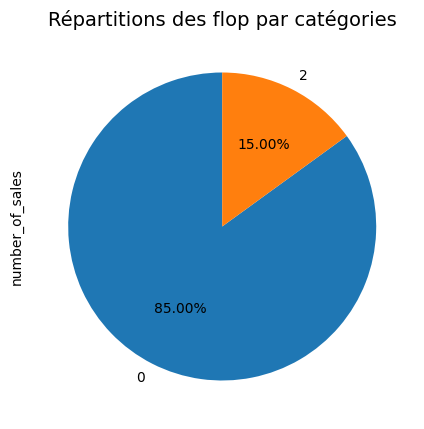

In [32]:
#flop references group by category
flop_ref_categ = flop_ref.groupby("categ").sum()

plt.figure(figsize=(9,5))
plt.title("Répartitions des flop par catégories", fontsize=14)
flop_ref_categ["number_of_sales"].plot(kind="pie", autopct='%1.2f%%', startangle=90)
#plt.savefig("Part2.Flop references distribution by category.png", bbox_inches='tight')
plt.show()

notes :
* 20 références ont été vendues moins de 2 fois ces deux dernières années sur la librairie en ligne
* Il n'y a pas de référence au flop dans la catégorie numéro 1
* Les références du flop sont majoritairement dans la catégorie numéro 0 (la moins chère avec 85%), et 15% dans la catégorie numéro 2

## **Conclusion (partie 2)**

**Ventes par catégorie de produits :**

* La catégorie numéro 0 est la catégorie de produits la moins chère et assez populaire, tout comme la catégorie numéro 1 qui se situe au milieu des prix et des ventes
* La catégorie numéro 2 est la plus chère et donc la moins vendue

**Répartition des clients par tranche d'âge :**


* La tranche d'âge 36-45 ans est celle qui achète le plus de produits en ligne et celle qui a le plus fort pourcentage d'achats au cours des deux dernières années
* Catégorie 0 : la plupart des clients ont plus de 30 ans dans cette catégorie "produits bon marché"
* Catégorie 1 : cette catégorie au milieu des prix et des soldes semble intéresser proportionnellement toutes les tranches d'âge
* Catégorie 2 : la plupart des clients ont moins de 25 ans dans cette catégorie "produits chers"

**Evolution des ventes et données enregistrées :**


* Les ventes en ligne ont atteint un pic de plus de 20 000 € par jour en février 2022
* Aucune vente n'a été enregistrée du 02 au 27 octobre 2021 sur la catégorie 1, nous avons donc dû supprimer le mois d'octobre 2021 dans la base de données pour éviter les moyennes biaisées
* L'évolution des ventes totales est plutôt stable dans le temps pour chaque catégorie de produits

**Profil client :**


* Il y a 4 clients B2B qui représentent 7% des ventes totales pour seulement 0,05% des clients totaux
* La première moitié des clients B2C détient 21% des ventes, et donc l'autre moitié détient 79% des ventes : la concentration des ventes est assez inégale entre les clients
* La répartition des ventes est la même quel que soit le sexe du client avec une consommation un peu plus élevée chez les femmes : elle croît initialement et atteint son maximum dans la tranche d'âge 36-45 ans, puis elle décroît avec l'âge

**Références Top et Flop :**


* 124 références ont été vendues plus de 1000 fois ces deux dernières années sur la librairie en ligne : aucune n'est dans la catégorie numéro 2, 2/3 sont dans la catégorie numéro 1 et 1/3 dans la catégorie numéro 0
* 20 références ont été vendues moins de 2 fois ces deux dernières années sur la librairie en ligne : aucune dans la catégorie numéro 1, majoritairement dans la catégorie numéro 0 (la moins chère) et quelques-unes dans la catégorie numéro 2 (la plus chère)

In [33]:
##l'analyse du comportement client Partie 3 est réalisée uniquement sur les clients b2c

#nous exportons la dataframe b2c pour l'importer sur la partie 3
lapage_df_b2c.to_csv("export_lapage_df_b2c.csv", sep=";")

In [34]:
lapage_df_b2c

,id_prod,time,session_id,client_id,date,year,period,sex,birth,age,price,categ,age_groups
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20,2022,2022-05,f,1986,37,4.18,0,36 - 45 ans
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02,2022,2022-02,m,1988,35,15.99,1,26 - 35 ans
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24,2021,2021-06,m,2000,23,69.99,2,16 - 25 ans
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11,2023,2023-01,m,1980,43,4.99,0,36 - 45 ans
5,0_1418,2022-10-20 15:59:16.084030,s_285425,c_1478,2022-10-20,2022,2022-10,f,1972,51,8.57,0,46 - 55 ans
...,...,...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,2022-01-15,2022,2022-01,f,1951,72,12.99,0,66 - 75 ans
679328,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,2022-03-19,2022,2022-03,f,1977,46,10.99,1,46 - 55 ans
679329,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,2022-12-20,2022,2022-12,f,1988,35,12.99,0,26 - 35 ans
679330,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,2021-07-16,2021,2021-07,m,1986,37,4.98,0,36 - 45 ans
